In [3]:
import numpy as np
from math import *
import matplotlib.pyplot as plt
from scipy.interpolate import splev, splrep, splint
from scipy.stats import norm
import time

use B-Spline to interpolate the curve:    
* disc_factor: $e^{-\int r_t dt}$
* forward_rate: $e^{\int r_t dt}$

In [20]:
# Curve class

class Curve():
    def __init__(self, in_k, in_fi):
        self._k = in_k
        self._fi = in_fi
        self.tck = splrep(self._k, self._fi)
    
    def instantaneous_rate(self, in_time):
        return splev(in_time, self.tck)

    def dev(self, in_time, d):
        return splev(in_time, self.tck, der = d)
    
    def disc_factor(self, start_time, end_time):
        # start your code here
        return exp(-splint(start_time, end_time, self.tck))
        # end your code here
    
    def forward_rate(self, start_time, end_time):
        rate = (exp(splint(start_time, end_time, self.tck)) - 1)/(end_time - start_time)
        return rate

# test playground

In [8]:
x = np.linspace(0, 10, 10)
y = np.sin(x)
spl = splrep(x, y)

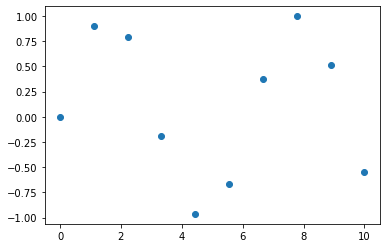

In [12]:
plt.plot(x,y,'o')
plt.show()

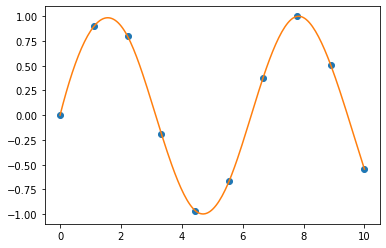

In [17]:
x2 = np.linspace(0, 10, 200)
y2 = splev(x2, spl)
plt.plot(x, y,'o', x2, y2)
plt.show()